# The Spark Foundation

## GRIP Sep 2021

# TASK 1: Prediction using Supervised ML

## by-Sakshi Padwal

### Problem Statement : Predict the percentage of a student based on the number of study hours

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
data=pd.read_csv('Simple linear regression.csv')
data

,Hours,Score
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Understanding dataset

In [3]:
data.dtypes

Hours    float64
Score      int64
dtype: object

In [4]:
data.describe()

,Hours,Score
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.shape

(25, 2)

## Data Pre-processing

In [6]:
print(data.isna().sum())

Hours    0
Score    0
dtype: int64


#### The sum of all the cells of Hours and Score is zero which implies that missing values don't exist in our dataset.

<AxesSubplot:>

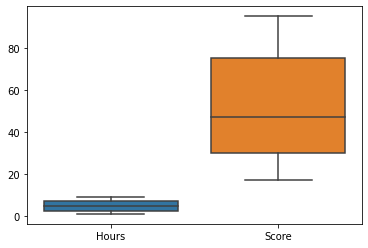

In [7]:
sns.boxplot(data=data)

#### we don't have any outliers.

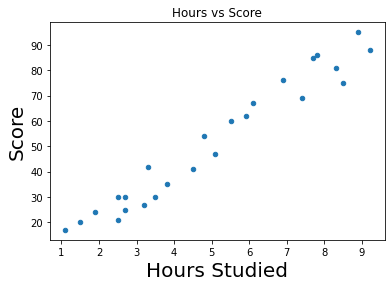

In [8]:
# check if any relationship between the variables
data.plot(kind='scatter',x='Hours',y='Score')
plt.title('Hours vs Score')
plt.xlabel('Hours Studied',fontsize=20)
plt.ylabel('Score',fontsize=20)
plt.show()

#### There is positive linear relationship between 'study hours' and  'score'.

## Model fitting

In [9]:
x=data.drop('Score',axis=1)  #target variable
y=data['Score']              #feature variable

#splitting data into training and testing data.
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=6,train_size=0.80)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 1)
(5, 1)
(20,)
(5,)


In [10]:
# fitting data
x_model=LinearRegression()
x_model.fit(x_train,y_train)

LinearRegression()

In [11]:
coeff=np.round(x_model.coef_[0],2)
print(coeff)
intercepts=np.round(x_model.intercept_,2)
print(intercepts)
print('Scores=',coeff,'* Hours +',intercepts)

10.05
1.39
Scores= 10.05 * Hours + 1.39


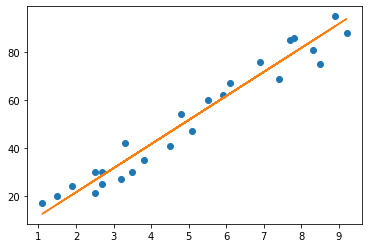

In [12]:
# plotting the regression line
plt.plot(x,y,'o')
plt.plot(x,x_model.coef_*x + x_model.intercept_)

## Making Predictions

In [13]:
y_pred=x_model.predict(x_test)
y_pred

array([39.59421488, 56.68453365, 16.47201889, 93.8811098 , 84.83329398])

In [14]:
# comparing actual vs predicted score
c=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
c

,Actual,Predicted
22,35,39.594215
7,60,56.684534
5,20,16.472019
6,88,93.881110
8,81,84.833294


In [15]:
# if a student studies for 9.25 hrs/day
hours=9.25
pred = x_model.predict([[hours]])[0]
print('The predicted score if a student studies for',f'{hours}hrs/day is',round(pred,2),'%')

The predicted score if a student studies for 9.25hrs/day is 94.38 %


## Evaluating the model

In [17]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 4.230413223140487
Mean Squared Error: 18.7654746734428
Root Mean Squared Error: 4.331913511768534
